IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
You are using an XGBoost version below 1.6.0 which is not fully supported by shap. Shap falls back to encoding the model as JSON which can lead to numerical precision issues. Please consider upgrading to XGBoost 1.6.0 or higher.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


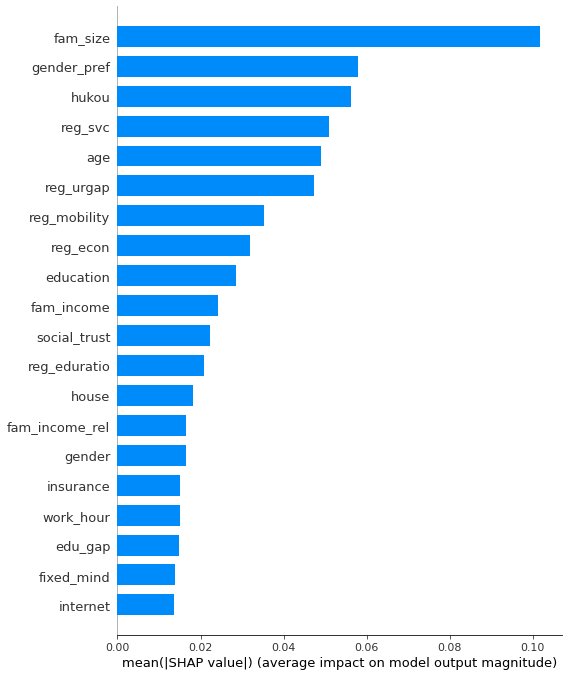

[0.01382374 0.01952722 0.01711863 0.01454314 0.04899607 0.11073078
 0.04677374 0.02914629 0.01393095 0.01798063 0.07714383 0.01449738
 0.01434352 0.01671342 0.02350061 0.01612053 0.01132231 0.01125514
 0.01043041 0.01816538 0.01789062 0.01462228 0.01571502 0.01429046
 0.01943385 0.01452888 0.01588096 0.01660274 0.01888874 0.01417817
 0.02099103 0.01871453 0.03541427 0.02660435 0.02698999 0.046132
 0.03935406 0.02933575 0.0483686 ]


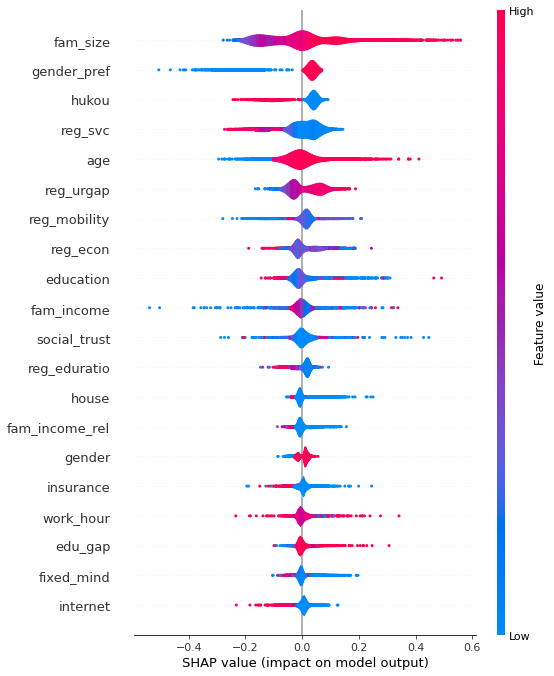

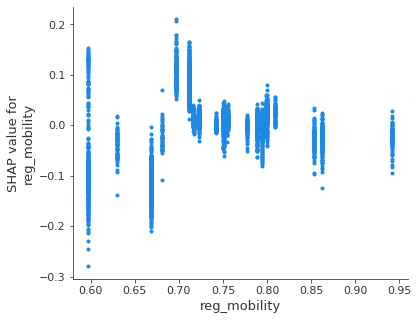

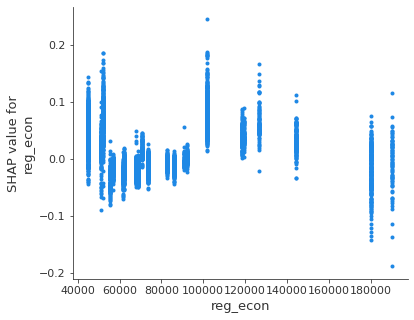

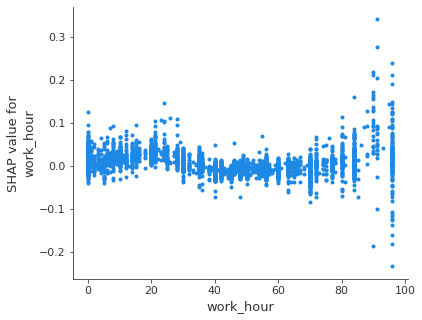

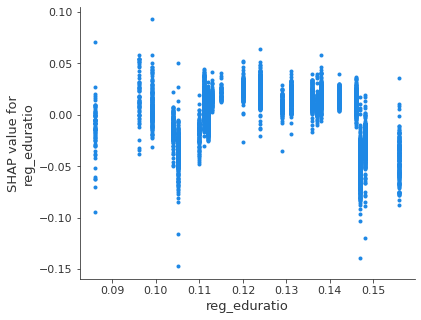

{'model_features': {'name': ['age', 'gender', 'urban', 'party', 'fam_size', 'hukou', 'ethno', 'education', 'age_gap', 'edu_gap', 'gender_pref', 'mar_satisfy', 'work', 'work_hour', 'insurance', 'care_from_par', 'fin_from_par', 'fin_par', 'care_par', 'internet', 'social_trust', 'social_status', 'fixed_mind', 'growth_mind', 'religion', 'gover_evalu', 'reg_eldercare', 'reg_childcare', 'health', 'reg_medicare', 'house', 'fam_income', 'fam_income_rel', 'area', 'reg_econ', 'reg_svc', 'reg_urgap', 'reg_eduratio', 'reg_mobility'], 'data': [0.014000000432133675, 0.019999999552965164, 0.017000000923871994, 0.014999999664723873, 0.04899999871850014, 0.11100000143051147, 0.04699999839067459, 0.028999999165534973, 0.014000000432133675, 0.017999999225139618, 0.07699999958276749, 0.014000000432133675, 0.014000000432133675, 0.017000000923871994, 0.024000000208616257, 0.01600000075995922, 0.010999999940395355, 0.010999999940395355, 0.009999999776482582, 0.017999999225139618, 0.017999999225139618, 0.0149

In [1]:
import numpy
import pandas
import shap
import matplotlib.pyplot as plt
from spsspro.algorithm import supervised_learning
#生成案例数据
data = pandas.read_csv("生育意愿数据0304.CSV")
data_y = data.iloc[:, 0]
data_x = data.iloc[:, 1:]
#xgboost分类，输入参数详细可以光标放置函数括号内按shift+tab查看，输出结果参考spsspro模板分析报告
result = supervised_learning.xgboost_regression(data_x=data_x, data_y=data_y)
# SHAP分析
explainer = shap.TreeExplainer(result['model'])
shap_values = explainer.shap_values(data_x)
shap.summary_plot(shap_values, data_x, feature_names=data_x.columns, plot_type="bar")
plt.show() 
# 可视化
print(result['model'].feature_importances_)
shap.summary_plot(shap_values, data_x, feature_names=data_x.columns, plot_type="violin")
shap.dependence_plot('reg_mobility', shap_values, data_x, interaction_index=None)
shap.dependence_plot('reg_econ', shap_values, data_x, interaction_index=None)
shap.dependence_plot('work_hour', shap_values, data_x, interaction_index=None)
shap.dependence_plot('reg_eduratio', shap_values, data_x, interaction_index=None)
print(result)